In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, recall_score, f1_score, log_loss

In [50]:
train_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/train.csv')
test_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/test.csv')
gender_submission = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/gender_submission.csv')

In [51]:
y_train = train_data['Survived']
X_train = train_data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked']) 

X_test = test_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
y_test = gender_submission['Survived']

In [52]:
X

,SibSp,Parch,Age,Fare,Sex,Embarked,Pclass
0,1,0,22.000000,7.2500,male,S,3
1,1,0,38.000000,71.2833,female,C,1
2,0,0,26.000000,7.9250,female,S,3
3,1,0,35.000000,53.1000,female,S,1
4,0,0,35.000000,8.0500,male,S,3
...,...,...,...,...,...,...,...
886,0,0,27.000000,13.0000,male,S,2
887,0,0,19.000000,30.0000,female,S,1
888,1,2,29.699118,23.4500,female,S,3
889,0,0,26.000000,30.0000,male,C,1


In [62]:
model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    cat_features=['Sex', 'Pclass', 'SibSp', 'Parch'] 
)
model.fit(X_train, y_train, verbose=100)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

0:	learn: 0.6657887	total: 3.78ms	remaining: 3.78s
100:	learn: 0.3405494	total: 135ms	remaining: 1.2s
200:	learn: 0.2946628	total: 265ms	remaining: 1.05s
300:	learn: 0.2439246	total: 390ms	remaining: 906ms
400:	learn: 0.2028001	total: 525ms	remaining: 784ms
500:	learn: 0.1678600	total: 658ms	remaining: 656ms
600:	learn: 0.1439259	total: 792ms	remaining: 526ms
700:	learn: 0.1253005	total: 915ms	remaining: 390ms
800:	learn: 0.1110910	total: 1.04s	remaining: 258ms
900:	learn: 0.0984281	total: 1.16s	remaining: 127ms
999:	learn: 0.0885475	total: 1.32s	remaining: 0us


In [54]:
auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

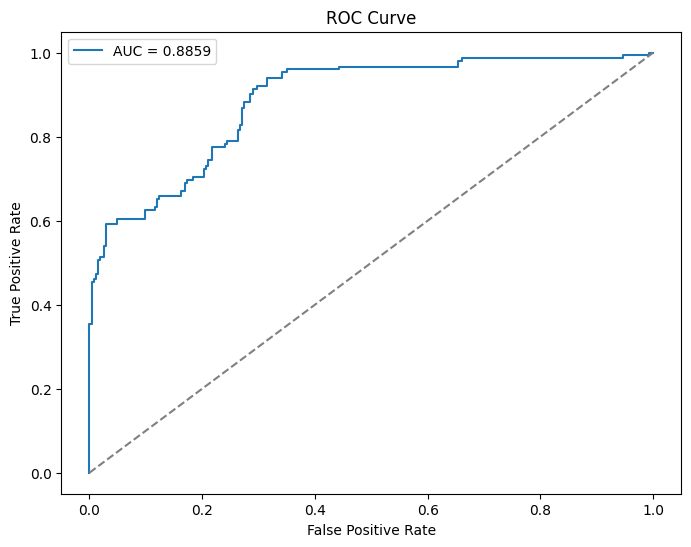

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

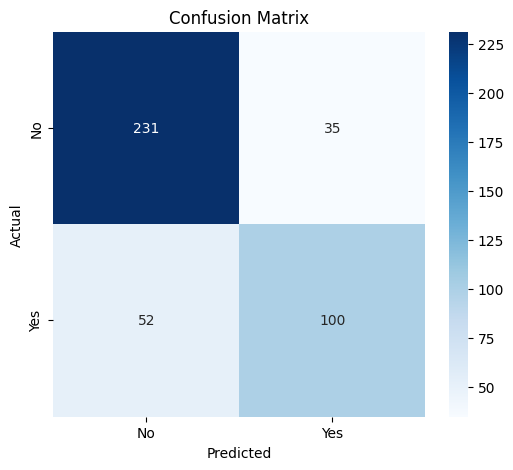

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f'AUC: {auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Log Loss: {logloss:.4f}')

print(classification_report(y_test, y_pred))

AUC: 0.8859
Precision: 0.7407
Recall: 0.6579
F1 Score: 0.6969
Log Loss: 0.4306
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       266
           1       0.74      0.66      0.70       152

    accuracy                           0.79       418
   macro avg       0.78      0.76      0.77       418
weighted avg       0.79      0.79      0.79       418



In [58]:
feature_importances = model.get_feature_importance()
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)

    Feature  Importance
2       Age   20.548757
6    Pclass   18.484464
0     SibSp   17.335925
3      Fare   16.518805
1     Parch   13.079220
5  Embarked    7.452378
4       Sex    6.580452


In [60]:
model.save_model("/Users/pahan/Desktop/Basics-of-Static-Training/models/catboost_titanic_model.cbm")